In [1]:
import os
import cv2
import numpy as np

def load_data_from_dir(directory):
    labels_dict = {"normal": 0, "pneumonia": 1}
    data = []
    labels = []
    
    for sub_folder, label in labels_dict.items():
        sub_folder_path = os.path.join(directory, sub_folder)
        for image_file in os.listdir(sub_folder_path):
            image = cv2.imread(os.path.join(sub_folder_path, image_file), cv2.IMREAD_GRAYSCALE)
            data.append(cv2.resize(image, (128, 128)))  # resizing the image to a standard size
            labels.append(label)
    
    return np.array(data), np.array(labels)


---- Train Data ----
Accuracy: 0.9910887880751782
F1 Score: 0.9919696306030077
Precision: 0.990090352666861
Recall: 0.9938560561732007
Log Loss: 0.10315078274109961

---- Test Data ----
Accuracy: 0.9378238341968912
F1 Score: 0.9436619718309859
Precision: 0.9481132075471698
Recall: 0.9392523364485982
Log Loss: 0.18932200412142974

---- Validation Data ----
Accuracy: 0.9649805447470817
F1 Score: 0.968421052631579
Precision: 0.9672897196261683
Recall: 0.9695550351288056
Log Loss: 0.1695752614960448



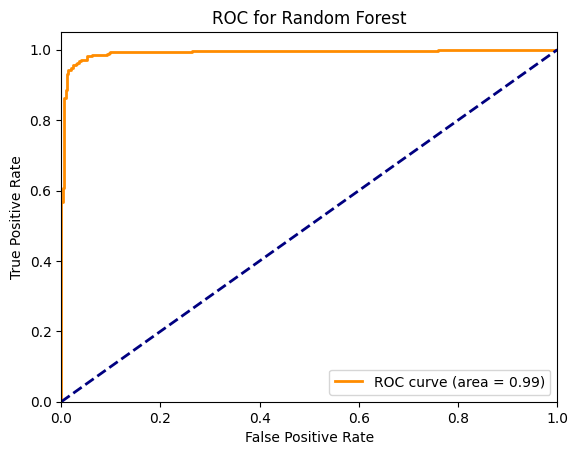

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_curve, auc, log_loss
import matplotlib.pyplot as plt


# Load Data
train_images, train_labels = load_data_from_dir("data_to_model/train")
test_images, test_labels = load_data_from_dir("data_to_model/test")
val_images, val_labels = load_data_from_dir("data_to_model/validation")

# Flatten Images
train_images_flat = train_images.reshape(train_images.shape[0], -1)
test_images_flat = test_images.reshape(test_images.shape[0], -1)
val_images_flat = val_images.reshape(val_images.shape[0], -1)

# Model with specific hyperparameters
rf_model = RandomForestClassifier(
    n_estimators=150,
    max_depth=15,
    min_samples_split=8,
    min_samples_leaf=6,
    max_features='sqrt',
    bootstrap=True,
    oob_score=True,
    random_state=42
)
rf_model.fit(train_images_flat, train_labels)


# Evaluate (Helper Function)
def evaluate_model(model, data, labels, dataset_name):
    pred = model.predict(data)
    pred_prob = model.predict_proba(data)[:, 1]
    
    acc = accuracy_score(labels, pred)
    f1 = f1_score(labels, pred)
    precision = precision_score(labels, pred)
    recall = recall_score(labels, pred)
    loss = log_loss(labels, pred_prob)

    print(f"---- {dataset_name} Data ----")
    print(f"Accuracy: {acc}\nF1 Score: {f1}\nPrecision: {precision}\nRecall: {recall}\nLog Loss: {loss}\n")
    
    return pred_prob, labels

# Performance Metrics
train_pred_prob, _ = evaluate_model(rf_model, train_images_flat, train_labels, "Train")
test_pred_prob, _ = evaluate_model(rf_model, test_images_flat, test_labels, "Test")
val_pred_prob, _ = evaluate_model(rf_model, val_images_flat, val_labels, "Validation")

# Plot ROC Curve (Using Validation Data for Demonstration)
fpr, tpr, _ = roc_curve(val_labels, val_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Random Forest')
plt.legend(loc="lower right")
plt.show()


---- Train Data ----
Accuracy: 0.9897116007777058
F1 Score: 0.9907400656215822
Precision: 0.9876435528419828
Recall: 0.9938560561732007
Log Loss: 0.1369614456169785

---- Test Data ----
Accuracy: 0.9352331606217616
F1 Score: 0.9417249417249418
Precision: 0.9395348837209302
Recall: 0.9439252336448598
Log Loss: 0.2392743422739526

---- Validation Data ----
Accuracy: 0.9507133592736705
F1 Score: 0.9549763033175355
Precision: 0.9664268585131894
Recall: 0.9437939110070258
Log Loss: 0.21969702729775162



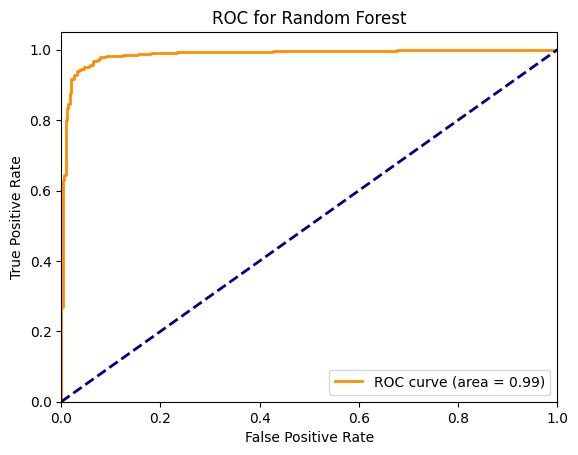

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_curve, auc, log_loss
import matplotlib.pyplot as plt


# Load Data
train_images, train_labels = load_data_from_dir("data_to_model_augmented/train")
test_images, test_labels = load_data_from_dir("data_to_model/test")
val_images, val_labels = load_data_from_dir("data_to_model/validation")


# Flatten Images
train_images_flat = train_images.reshape(train_images.shape[0], -1)
test_images_flat = test_images.reshape(test_images.shape[0], -1)
val_images_flat = val_images.reshape(val_images.shape[0], -1)

# Model with specific hyperparameters
rf_model = RandomForestClassifier(
    n_estimators=150,
    max_depth=15,
    min_samples_split=8,
    min_samples_leaf=6,
    max_features='sqrt',
    bootstrap=True,
    oob_score=True,
    random_state=42
)
rf_model.fit(train_images_flat, train_labels)


# Evaluate (Helper Function)
def evaluate_model(model, data, labels, dataset_name):
    pred = model.predict(data)
    pred_prob = model.predict_proba(data)[:, 1]
    
    acc = accuracy_score(labels, pred)
    f1 = f1_score(labels, pred)
    precision = precision_score(labels, pred)
    recall = recall_score(labels, pred)
    loss = log_loss(labels, pred_prob)

    print(f"---- {dataset_name} Data ----")
    print(f"Accuracy: {acc}\nF1 Score: {f1}\nPrecision: {precision}\nRecall: {recall}\nLog Loss: {loss}\n")
    
    return pred_prob, labels

# Performance Metrics
train_pred_prob, _ = evaluate_model(rf_model, train_images_flat, train_labels, "Train")
test_pred_prob, _ = evaluate_model(rf_model, test_images_flat, test_labels, "Test")
val_pred_prob, _ = evaluate_model(rf_model, val_images_flat, val_labels, "Validation")

# Plot ROC Curve (Using Validation Data for Demonstration)
fpr, tpr, _ = roc_curve(val_labels, val_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Random Forest')
plt.legend(loc="lower right")
plt.show()
